# Disease classification

#### Edib Hamza Arslan 21626934

## Table of Content

[Problem](#problem)   
[Data Understanding](#data_understanding)   
[Data Preparation](#data_preparation)   
[Modeling](#modeling)   
[Evaluation](#evaluation)   
[References](#references)

## Problem <a class="anchor" id="problem"></a>

The problem is classification of diseases depend on features. There are 49 feature and the feature number is too much for we application, when we are classfied the disease we should consider total number of used features.

## Data Understanding<a class="anchor" id="data_understanding"></a>

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = 'sdsp_patients.xlsx'
main_df = pd.read_excel(data_path)

In [84]:
pd.unique(main_df['Disease'])

array(['Disease_1', 'Disease_2', 'Disease_3', 'Disease_4'], dtype=object)

In [3]:
df = main_df.copy()

In [4]:
df

,Disease,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_41,Feature_42,Feature_43,Feature_44,Feature_45,Feature_46,Feature_47,Feature_48,Feature_49,Feature_50
0,Disease_1,Male,28.0,130,96.0,2.0,No,Yes,Yes,No,...,No,No,No,0,No,No,No,No,No,No
1,Disease_1,Male,18.0,95,46.0,3.0,Yes,No,No,No,...,No,Yes,No,0,No,No,No,No,No,No
2,Disease_1,Male,44.0,152,150.0,1.0,No,Yes,No,Yes,...,Yes,No,No,0,No,No,No,No,No,No
3,Disease_1,Male,19.0,112,66.0,18.0,No,No,No,Yes,...,No,Yes,No,0,No,No,No,No,No,No
4,Disease_1,Male,17.5,105.5,54.0,3.0,No,No,Yes,Yes,...,No,No,No,0,No,No,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Disease_1,Female,36.0,142,144.0,24.0,No,No,No,Yes,...,Yes,No,No,8,Yes,No,No,No,No,No
396,Disease_1,Male,60.0,172,165.0,120.0,No,No,Yes,No,...,No,No,No,9,Yes,No,No,No,No,No
397,Disease_1,Female,41.0,147,156.0,60.0,No,Yes,No,No,...,No,No,No,9,Yes,Yes,Yes,No,No,No
398,Disease_1,Male,37.0,138,144.0,120.0,No,Yes,No,No,...,No,No,No,9,Yes,No,No,No,No,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Disease     400 non-null    object 
 1   Feature_1   400 non-null    object 
 2   Feature_2   400 non-null    float64
 3   Feature_3   400 non-null    object 
 4   Feature_4   400 non-null    float64
 5   Feature_5   400 non-null    float64
 6   Feature_6   400 non-null    object 
 7   Feature_7   400 non-null    object 
 8   Feature_8   400 non-null    object 
 9   Feature_9   400 non-null    object 
 10  Feature_10  400 non-null    object 
 11  Feature_11  400 non-null    object 
 12  Feature_12  400 non-null    object 
 13  Feature_13  400 non-null    object 
 14  Feature_14  400 non-null    object 
 15  Feature_15  400 non-null    object 
 16  Feature_16  400 non-null    object 
 17  Feature_17  400 non-null    object 
 18  Feature_18  400 non-null    object 
 19  Feature_19  400 non-null    o

## Data Preparation<a class="anchor" id="data_preparation"></a>

Replace some values with binary values.

In [6]:
df = df.replace("Yes", 1)
df = df.replace("No", 0)
df = df.replace("Male", 1)
df = df.replace("Female", 0)

Even I changed Yes and No with 1 and 0, some features's are still object data dtpe. I have to examine them and convert them to integer value.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Disease     400 non-null    object 
 1   Feature_1   400 non-null    int64  
 2   Feature_2   400 non-null    float64
 3   Feature_3   400 non-null    object 
 4   Feature_4   400 non-null    float64
 5   Feature_5   400 non-null    float64
 6   Feature_6   400 non-null    int64  
 7   Feature_7   400 non-null    int64  
 8   Feature_8   400 non-null    int64  
 9   Feature_9   400 non-null    int64  
 10  Feature_10  400 non-null    int64  
 11  Feature_11  400 non-null    int64  
 12  Feature_12  400 non-null    int64  
 13  Feature_13  400 non-null    int64  
 14  Feature_14  400 non-null    int64  
 15  Feature_15  400 non-null    int64  
 16  Feature_16  400 non-null    int64  
 17  Feature_17  400 non-null    int64  
 18  Feature_18  400 non-null    int64  
 19  Feature_19  400 non-null    i

As you can see the Feature_47 has only 1 and 0 in the first seen, but data type is object. To examine it, I used to pd.unique. 
It returns unique value which is targeted feature. 

The Feature_47 has also empty character.


In [8]:
pd.unique(df['Feature_47'])

array([0, 1, ' '], dtype=object)

The total number of empty characters are 20

In [9]:
df['Feature_47'].value_counts()

0    320
1     60
      20
Name: Feature_47, dtype: int64

The empty characters are also exist in Feature_3, therefore even it has numeric values,
the data dype shows object.

In [10]:
pd.unique(df['Feature_3'])

array([130, 95, 152, 112, 105.5, 100, 143, 111, 138, 120, 156, 181, 154,
       133, 131, 175, 123, 105, 114, 94, 128, 153, 158, 110, 104, 118,
       122, 145, 135, 106, 101, 84, 113, 92, 93, 151, 107, 117, 115, 142,
       102, 88, 144, 155, 165, 140, 159, 160, 162, 161, 167, 148, 141,
       134, 116, 147, 149, 173, 150, 157, 146, ' ', 178, 139, 124, 108,
       121, 164, 87, 109, 132, 123.5, 129, 125, 142.5, 163, 127, 90, 96,
       126, 91, 137, 171, 135.2, 168, 166, 180, 124.5, 116.5, 136, 97,
       119, 98, 89, 76, 125.5, 128.5, 172], dtype=object)

In [11]:
df[df['Feature_3'] == ' ']

,Disease,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_41,Feature_42,Feature_43,Feature_44,Feature_45,Feature_46,Feature_47,Feature_48,Feature_49,Feature_50
166,Disease_3,0,30.0,,138.0,1.0,0,1,0,0,...,1,0,1,0,0,0,1,0,1,1
284,Disease_1,0,17.0,,53.0,6.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


If I remove this empty character, I lose data, therefore I choose to put the value of  mean of Feature_3.

In [12]:
feature_3_mean = np.mean(df[df['Feature_3'] != ' ']['Feature_3'])
print(feature_3_mean)

127.77060301507537


I put mean values manually in here. The index coming from empty character where in feature_3

In [13]:
df.iloc[166, df.columns.get_loc('Feature_3')] = feature_3_mean
df.iloc[284, df.columns.get_loc('Feature_3')] = feature_3_mean

In [14]:
df.iloc[166, df.columns.get_loc('Feature_3')]

127.77060301507537

I can convert the feature_3 to float now.

In [15]:
df['Feature_3'] = df['Feature_3'].astype('float')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Disease     400 non-null    object 
 1   Feature_1   400 non-null    int64  
 2   Feature_2   400 non-null    float64
 3   Feature_3   400 non-null    float64
 4   Feature_4   400 non-null    float64
 5   Feature_5   400 non-null    float64
 6   Feature_6   400 non-null    int64  
 7   Feature_7   400 non-null    int64  
 8   Feature_8   400 non-null    int64  
 9   Feature_9   400 non-null    int64  
 10  Feature_10  400 non-null    int64  
 11  Feature_11  400 non-null    int64  
 12  Feature_12  400 non-null    int64  
 13  Feature_13  400 non-null    int64  
 14  Feature_14  400 non-null    int64  
 15  Feature_15  400 non-null    int64  
 16  Feature_16  400 non-null    int64  
 17  Feature_17  400 non-null    int64  
 18  Feature_18  400 non-null    int64  
 19  Feature_19  400 non-null    i

As I said before about feature_47, the condition is exist for
* feature_48
* feature_49
* feature_50

To making more dynamic, first of all I take the empty character index from the features.
Then I calculate the mean of spesific feature mean.
The finally, I remove the empty character and put the mean value.

In [17]:
feature_47_empty_data_list = df.index[df.iloc[:, df.columns.get_loc('Feature_47')] == ' '].tolist()
feature_48_empty_data_list = df.index[df.iloc[:, df.columns.get_loc('Feature_48')] == ' '].tolist()
feature_49_empty_data_list = df.index[df.iloc[:, df.columns.get_loc('Feature_49')] == ' '].tolist()
feature_50_empty_data_list = df.index[df.iloc[:, df.columns.get_loc('Feature_50')] == ' '].tolist()

In [18]:
feature_47_empty_data_list

[109,
 114,
 121,
 122,
 131,
 133,
 140,
 153,
 154,
 182,
 183,
 196,
 278,
 321,
 334,
 350,
 351,
 352,
 353,
 354]

The features mean values.

In [19]:
feature_47_mean = np.mean(df[df['Feature_47'] != ' ']['Feature_47'])
print(int(feature_47_mean))

0


In [20]:
feature_48_mean = np.mean(df[df['Feature_48'] != ' ']['Feature_48'])
print(round(feature_48_mean))

0


In [21]:
feature_49_mean = np.mean(df[df['Feature_49'] != ' ']['Feature_49'])
print(round(feature_49_mean))

0


In [22]:
feature_50_mean = np.mean(df[df['Feature_50'] != ' ']['Feature_50'])
print(round(feature_50_mean))

0


Basically this function remove the empty chracter and put the mean value with spesified feature.

In [23]:
def empty_data_converter(feature_list, feature_name, feature_mean_value):
    for index in feature_list:
        df.iloc[index, df.columns.get_loc(feature_name)] = feature_mean_value

In [24]:
empty_data_converter(feature_47_empty_data_list, 'Feature_47', round(feature_47_mean))
empty_data_converter(feature_48_empty_data_list, 'Feature_48', round(feature_48_mean))
empty_data_converter(feature_49_empty_data_list, 'Feature_49', round(feature_49_mean))
empty_data_converter(feature_50_empty_data_list, 'Feature_50', round(feature_50_mean))

In [25]:
print(pd.unique(df['Feature_47']))
print(pd.unique(df['Feature_48']))
print(pd.unique(df['Feature_49']))
print(pd.unique(df['Feature_50']))

[0 1]
[0 1]
[0 1]
[0 1]


In [26]:
df['Feature_47'] = df['Feature_47'].astype('int')
df['Feature_48'] = df['Feature_48'].astype('int')
df['Feature_49'] = df['Feature_49'].astype('int')
df['Feature_50'] = df['Feature_50'].astype('int')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Disease     400 non-null    object 
 1   Feature_1   400 non-null    int64  
 2   Feature_2   400 non-null    float64
 3   Feature_3   400 non-null    float64
 4   Feature_4   400 non-null    float64
 5   Feature_5   400 non-null    float64
 6   Feature_6   400 non-null    int64  
 7   Feature_7   400 non-null    int64  
 8   Feature_8   400 non-null    int64  
 9   Feature_9   400 non-null    int64  
 10  Feature_10  400 non-null    int64  
 11  Feature_11  400 non-null    int64  
 12  Feature_12  400 non-null    int64  
 13  Feature_13  400 non-null    int64  
 14  Feature_14  400 non-null    int64  
 15  Feature_15  400 non-null    int64  
 16  Feature_16  400 non-null    int64  
 17  Feature_17  400 non-null    int64  
 18  Feature_18  400 non-null    int64  
 19  Feature_19  400 non-null    i

Before the this point, I investigate some object data type's and I find unapprovel 
values in them. I handled them, and as you can see up above output, their data type's integer now.

Now, I examine the total number of data is smaller than 400. The reason of that they have Null object type.

In [28]:
pd.unique(df['Feature_28'])

array(['Every Day', '1-2 Days a Week', '3-4 Days a Week',
       '1-2 Days a Month', nan], dtype=object)

In [29]:
pd.unique(df['Feature_29'])

array(['No Difference', 'Evenings', 'Mornings'], dtype=object)

To working more practically, I change Nan object type to with string 'Nan'. 

In [30]:
df = df.replace(np.nan, 'Nan')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Disease     400 non-null    object 
 1   Feature_1   400 non-null    int64  
 2   Feature_2   400 non-null    float64
 3   Feature_3   400 non-null    float64
 4   Feature_4   400 non-null    float64
 5   Feature_5   400 non-null    float64
 6   Feature_6   400 non-null    int64  
 7   Feature_7   400 non-null    int64  
 8   Feature_8   400 non-null    int64  
 9   Feature_9   400 non-null    int64  
 10  Feature_10  400 non-null    int64  
 11  Feature_11  400 non-null    int64  
 12  Feature_12  400 non-null    int64  
 13  Feature_13  400 non-null    int64  
 14  Feature_14  400 non-null    int64  
 15  Feature_15  400 non-null    int64  
 16  Feature_16  400 non-null    int64  
 17  Feature_17  400 non-null    int64  
 18  Feature_18  400 non-null    int64  
 19  Feature_19  400 non-null    i

In [32]:
pd.unique(df['Feature_28'])

array(['Every Day', '1-2 Days a Week', '3-4 Days a Week',
       '1-2 Days a Month', 'Nan'], dtype=object)

In [33]:
pd.unique(df['Feature_29'])

array(['No Difference', 'Evenings', 'Mornings'], dtype=object)

The unique values 1, 0, and Nan. I have remove the Nan value.

In [34]:
print(pd.unique(df['Feature_32']))
print(pd.unique(df['Feature_33']))
print(pd.unique(df['Feature_35']))
print(pd.unique(df['Feature_36']))

[1.0 0.0 'Nan']
[0.0 1.0 'Nan']
[0.0 1.0 'Nan']
[0.0 1.0 'Nan']


In [35]:
print('Feature 32 nan values are ', len(df[df['Feature_32'] == 'Nan']))
print('Feature 33 nan values are ', len(df[df['Feature_33'] == 'Nan']))
print('Feature 35 nan values are ', len(df[df['Feature_35'] == 'Nan']))
print('Feature 36 nan values are ', len(df[df['Feature_36'] == 'Nan']))

Feature 32 nan values are  16
Feature 33 nan values are  12
Feature 35 nan values are  43
Feature 36 nan values are  259


The feature_36 has 259 nan value which is very high depend on the others. I decide to drop it.

In [36]:
df = df.drop(columns=['Feature_36'], axis=1)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Disease     400 non-null    object 
 1   Feature_1   400 non-null    int64  
 2   Feature_2   400 non-null    float64
 3   Feature_3   400 non-null    float64
 4   Feature_4   400 non-null    float64
 5   Feature_5   400 non-null    float64
 6   Feature_6   400 non-null    int64  
 7   Feature_7   400 non-null    int64  
 8   Feature_8   400 non-null    int64  
 9   Feature_9   400 non-null    int64  
 10  Feature_10  400 non-null    int64  
 11  Feature_11  400 non-null    int64  
 12  Feature_12  400 non-null    int64  
 13  Feature_13  400 non-null    int64  
 14  Feature_14  400 non-null    int64  
 15  Feature_15  400 non-null    int64  
 16  Feature_16  400 non-null    int64  
 17  Feature_17  400 non-null    int64  
 18  Feature_18  400 non-null    int64  
 19  Feature_19  400 non-null    i

In [38]:
print('Feature 32 nan values are ', len(df[df['Feature_32'] == 'Nan']))
print('Feature 33 nan values are ', len(df[df['Feature_33'] == 'Nan']))
print('Feature 35 nan values are ', len(df[df['Feature_35'] == 'Nan']))

Feature 32 nan values are  16
Feature 33 nan values are  12
Feature 35 nan values are  43


The other nan value changed with own feature meaned value.

In [39]:
feature_32_mean = np.mean(df[df['Feature_32'] != 'Nan']['Feature_32'])
print(round(feature_32_mean))

1


In [40]:
feature_33_mean = np.mean(df[df['Feature_33'] != 'Nan']['Feature_33'])
print(round(feature_33_mean))

0


In [41]:
feature_35_mean = np.mean(df[df['Feature_35'] != 'Nan']['Feature_35'])
print(round(feature_35_mean))

0


I took the nan values index.

In [42]:
feature_32_nan_data_list = df.index[df.iloc[:, df.columns.get_loc('Feature_32')] == 'Nan'].tolist()
feature_33_nan_data_list = df.index[df.iloc[:, df.columns.get_loc('Feature_33')] == 'Nan'].tolist()
feature_35_nan_data_list = df.index[df.iloc[:, df.columns.get_loc('Feature_35')] == 'Nan'].tolist()

In [43]:
empty_data_converter(feature_32_nan_data_list, 'Feature_32', round(feature_32_mean))
empty_data_converter(feature_33_nan_data_list, 'Feature_33', round(feature_33_mean))
empty_data_converter(feature_35_nan_data_list, 'Feature_35', round(feature_35_mean))

In [44]:
print(pd.unique(df['Feature_32']))
print(pd.unique(df['Feature_33']))
print(pd.unique(df['Feature_35']))

[1.0 0.0]
[0.0 1.0]
[0.0 1.0]


In [45]:

df['Feature_32'] = df['Feature_32'].astype('int')
df['Feature_33'] = df['Feature_33'].astype('int')
df['Feature_35'] = df['Feature_35'].astype('int')

Finally I remove the all nan values and convert the datatype to integer safely.

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Disease     400 non-null    object 
 1   Feature_1   400 non-null    int64  
 2   Feature_2   400 non-null    float64
 3   Feature_3   400 non-null    float64
 4   Feature_4   400 non-null    float64
 5   Feature_5   400 non-null    float64
 6   Feature_6   400 non-null    int64  
 7   Feature_7   400 non-null    int64  
 8   Feature_8   400 non-null    int64  
 9   Feature_9   400 non-null    int64  
 10  Feature_10  400 non-null    int64  
 11  Feature_11  400 non-null    int64  
 12  Feature_12  400 non-null    int64  
 13  Feature_13  400 non-null    int64  
 14  Feature_14  400 non-null    int64  
 15  Feature_15  400 non-null    int64  
 16  Feature_16  400 non-null    int64  
 17  Feature_17  400 non-null    int64  
 18  Feature_18  400 non-null    int64  
 19  Feature_19  400 non-null    i

The feature_28 and feature_29 different from the other feature because they have categorical 
values. Therefore I have to use encoder for them.

I also find nan value on some of them. I can't use mean for the categorical values. I decide to 
change this nan values with the most number of categorical value.


In [47]:
print(pd.unique(df['Feature_28']))
print(pd.unique(df['Feature_29']))

['Every Day' '1-2 Days a Week' '3-4 Days a Week' '1-2 Days a Month' 'Nan']
['No Difference' 'Evenings' 'Mornings']


In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
le_feature_29 = LabelEncoder()
df['Feature_29'] = le_feature_29.fit_transform(np.array(df['Feature_29']))

In [50]:
le_feature_29.classes_

array(['Evenings', 'Mornings', 'No Difference'], dtype=object)

In [51]:
df['Feature_28'].value_counts()

Every Day           205
1-2 Days a Week      69
1-2 Days a Month     65
3-4 Days a Week      60
Nan                   1
Name: Feature_28, dtype: int64

In [52]:
df[df['Feature_28'] == 'Nan']

,Disease,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_41,Feature_42,Feature_43,Feature_44,Feature_45,Feature_46,Feature_47,Feature_48,Feature_49,Feature_50
368,Disease_1,0,30.0,135.0,131.0,12.0,0,0,1,0,...,0,0,0,2,1,0,0,0,0,0


In [53]:
df.iloc[368, df.columns.get_loc('Feature_28')] = 'Every Day'

In [54]:
df['Feature_28'].value_counts()

Every Day           206
1-2 Days a Week      69
1-2 Days a Month     65
3-4 Days a Week      60
Name: Feature_28, dtype: int64

In [55]:
le_feature_28 = LabelEncoder()
df['Feature_28'] = le_feature_28.fit_transform(np.array(df['Feature_28']))

In [56]:
le_feature_28.classes_

array(['1-2 Days a Month', '1-2 Days a Week', '3-4 Days a Week',
       'Every Day'], dtype=object)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Disease     400 non-null    object 
 1   Feature_1   400 non-null    int64  
 2   Feature_2   400 non-null    float64
 3   Feature_3   400 non-null    float64
 4   Feature_4   400 non-null    float64
 5   Feature_5   400 non-null    float64
 6   Feature_6   400 non-null    int64  
 7   Feature_7   400 non-null    int64  
 8   Feature_8   400 non-null    int64  
 9   Feature_9   400 non-null    int64  
 10  Feature_10  400 non-null    int64  
 11  Feature_11  400 non-null    int64  
 12  Feature_12  400 non-null    int64  
 13  Feature_13  400 non-null    int64  
 14  Feature_14  400 non-null    int64  
 15  Feature_15  400 non-null    int64  
 16  Feature_16  400 non-null    int64  
 17  Feature_17  400 non-null    int64  
 18  Feature_18  400 non-null    int64  
 19  Feature_19  400 non-null    i

Finally, I convert the feature's data to integer values. Now I can search the important features.

### Feature Selection

The correlation heatmap.

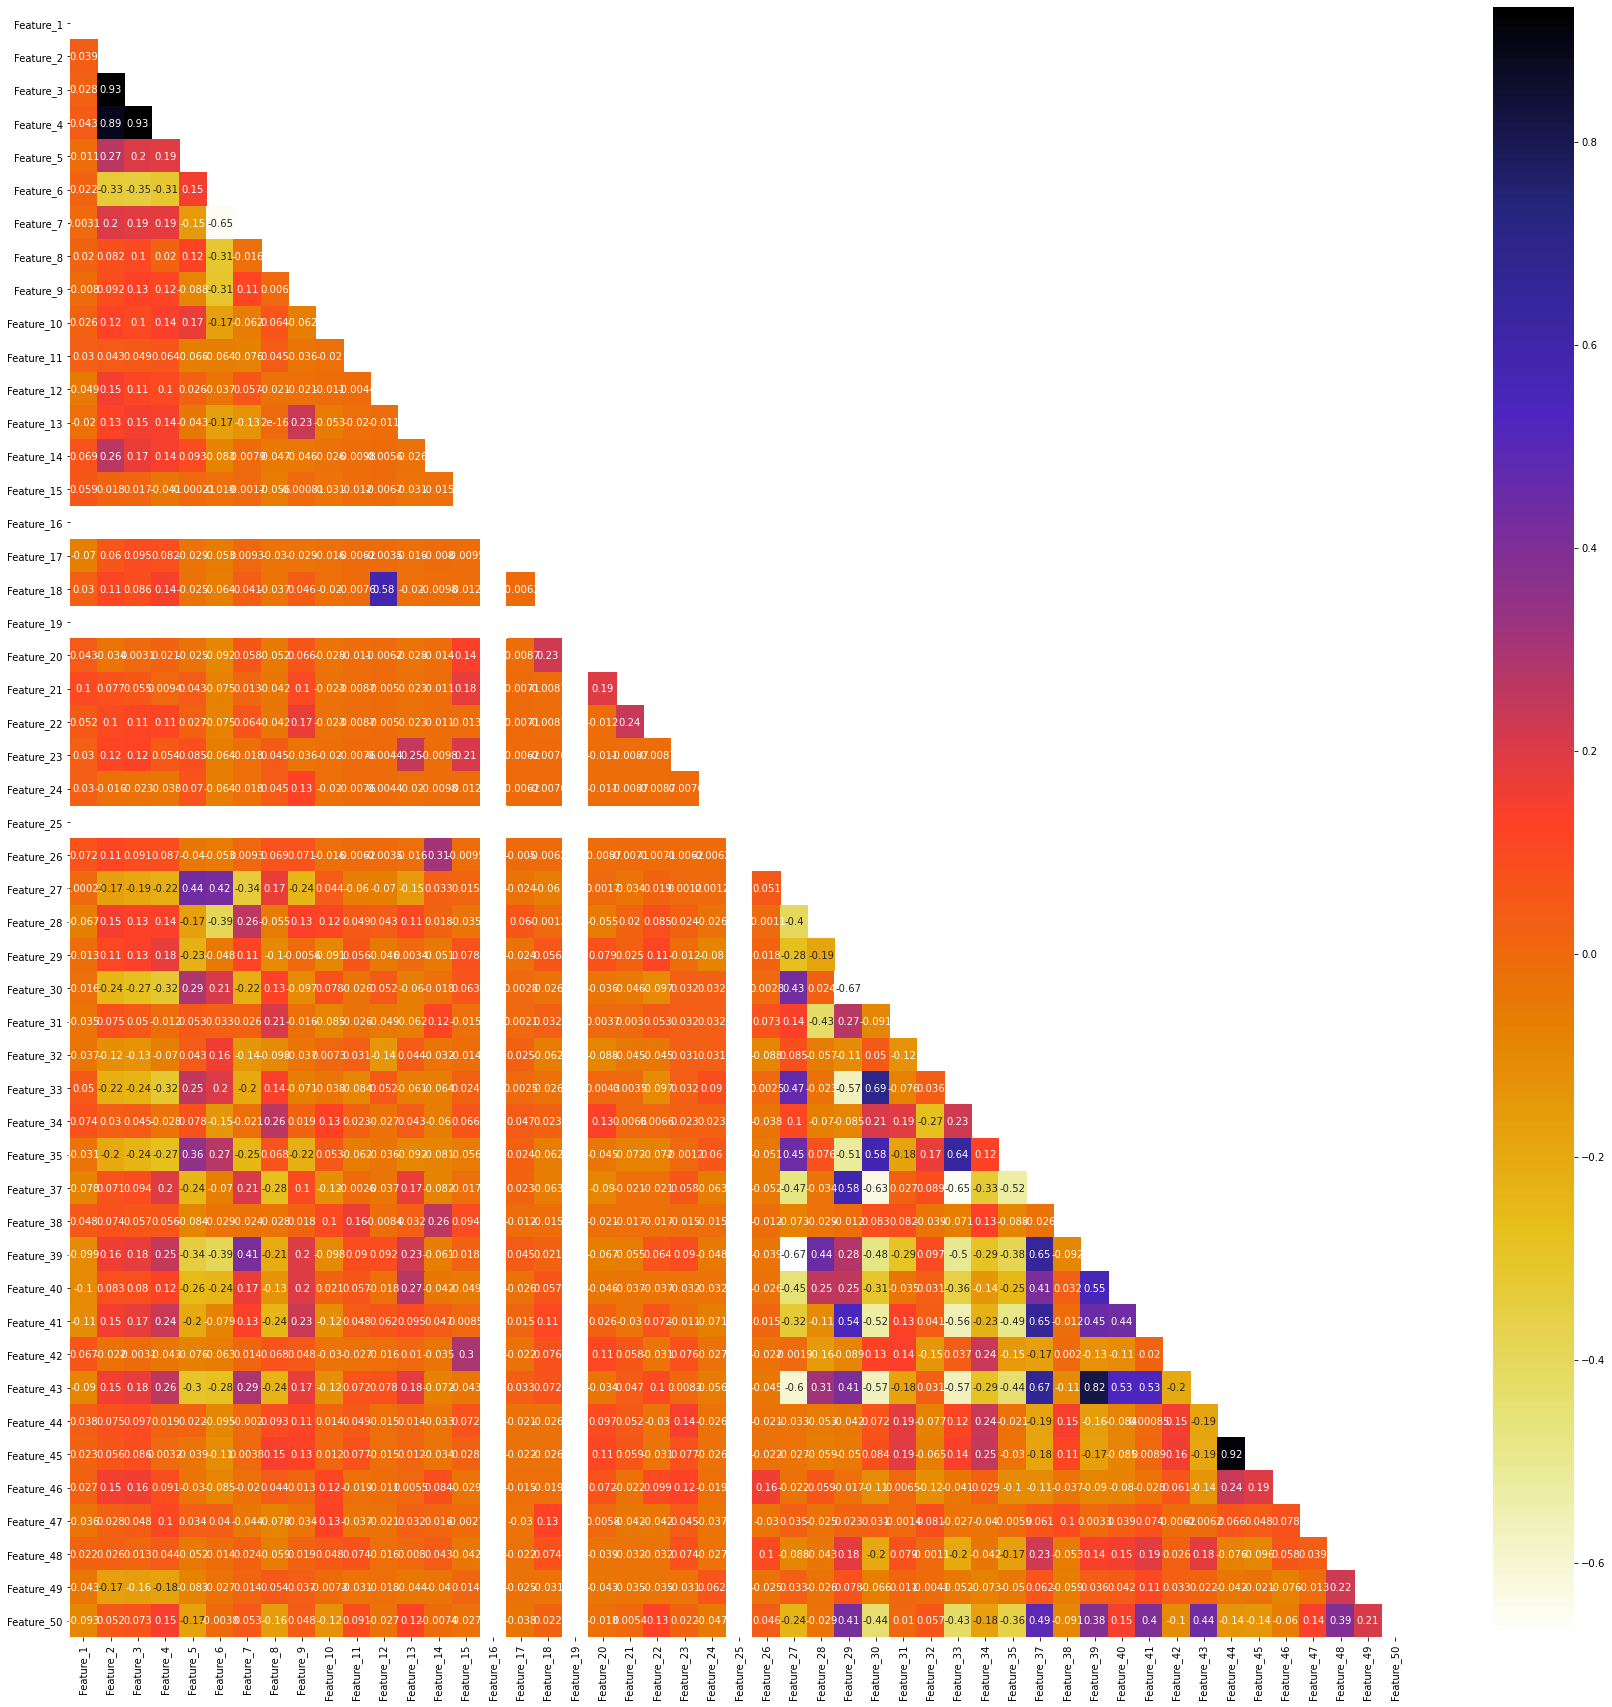

In [58]:
plt.figure(figsize=(30, 30))
cor = df.corr()
mask = np.triu(np.ones_like(cor, dtype=bool))
sns.heatmap(cor, mask=mask, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [59]:
df.shape

(400, 50)

First of all I try to drop the features depend on correlation is bigger than 0.95.

In [60]:
# Calculate the correlation matrix and take the absolute value
corr_matrix = df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.95)]

print('Dropped val ', to_drop)
# Drop the features in the to_drop list
reduced_df = df.drop(to_drop, axis=1)

print("The reduced dataframe has {} columns.".format(reduced_df.shape[1]))

Dropped val  []
The reduced dataframe has 50 columns.


But I can't find strong correlation with this method.

In [61]:
reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Disease     400 non-null    object 
 1   Feature_1   400 non-null    int64  
 2   Feature_2   400 non-null    float64
 3   Feature_3   400 non-null    float64
 4   Feature_4   400 non-null    float64
 5   Feature_5   400 non-null    float64
 6   Feature_6   400 non-null    int64  
 7   Feature_7   400 non-null    int64  
 8   Feature_8   400 non-null    int64  
 9   Feature_9   400 non-null    int64  
 10  Feature_10  400 non-null    int64  
 11  Feature_11  400 non-null    int64  
 12  Feature_12  400 non-null    int64  
 13  Feature_13  400 non-null    int64  
 14  Feature_14  400 non-null    int64  
 15  Feature_15  400 non-null    int64  
 16  Feature_16  400 non-null    int64  
 17  Feature_17  400 non-null    int64  
 18  Feature_18  400 non-null    int64  
 19  Feature_19  400 non-null    i

Then I want to check what is the classification accuracy with original data.
I choose RandomForest classifier for that.
I split the data in here 
* %80 training
* %20 test

In [62]:
test_df = reduced_df

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc


le = LabelEncoder()
y = le.fit_transform(np.array(test_df['Disease']))
X = test_df.drop(labels=['Disease'],axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfc = RandomForestClassifier()
rfc_predicted = rfc.fit(X_train, y_train).predict(X_test)


print ('Accuracy Score :',accuracy_score(y_test, rfc_predicted))

print ('Report : ')
print (classification_report(y_test, rfc_predicted))


print(roc_auc_score(y_test, rfc.predict_proba(X_test), multi_class='ovr'))

Accuracy Score : 0.975
Report : 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       1.00      0.86      0.92         7
           2       0.93      0.93      0.93        14
           3       1.00      1.00      1.00         5

    accuracy                           0.97        80
   macro avg       0.98      0.95      0.96        80
weighted avg       0.98      0.97      0.97        80

0.9970386348811007


In [63]:
X_train.shape

(320, 49)

As you can see the accuracy is 0.975 which is very nice. But the total feature number is very high. 
Therefore when I drop the features, I have to consider accuracy. 
I took this course from data camp  https://learn.datacamp.com/courses/dimensionality-reduction-in-python for how to reduce dimension of data.
Depend on this course, there is a function which is RFE from sklearn.feature_selection. It's making feature selection to automatically.
First of all it's calculate correlations and drop the smallest of them. Then It's calculate again. Its happening until number of features selected which initialized a paramether. After I try to different hypermaters I find **seven** features is giving best accuracy, which is 1.0 . 
Before the use this function I used to standard scaler normalization for logistic regression.

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

lr = LogisticRegression()
lr.fit(X_train_std, y_train)

X_test_std = scaler.transform(X_test)

y_pred = lr.predict(X_test_std)
print(accuracy_score(y_test, y_pred))


0.9375


In [65]:
X_train_std.shape

(320, 49)

Without feature selection the logistic regression is giving 0.93 accuracy with 49 features.

In [66]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=LogisticRegression(), n_features_to_select=7, verbose=1)

rfe.fit(X_train_std, y_train)


Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 fe

RFE(estimator=LogisticRegression(), n_features_to_select=7, verbose=1)

In [69]:
features = X.columns[rfe.support_]
print('The chosen features from feature selection ', list(features))



The chosen features from feature selection  ['Feature_5', 'Feature_27', 'Feature_32', 'Feature_37', 'Feature_39', 'Feature_40', 'Feature_43']


In [70]:
print("RFE test accuracy is " , accuracy_score(y_test, rfe.predict(X_test_std)))

RFE test accuracy is  1.0


The rfe prediction on test data is 1.0. Now I choose the new features, and train the logistic regression and test the results with test data

In [71]:
print("Original data shape is ", X.shape)
new_X = X.loc[:, features]
print("After feature selection the data shape is ", new_X.shape)

Original data shape is  (400, 49)
After feature selection the data shape is  (400, 7)


After this new feautures, I split data and scaled them.

In [72]:
reduced_X_train, reduced_X_test, reduced_y_train, reduced_y_test = train_test_split(new_X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
reduced_X_train_std = scaler.fit_transform(reduced_X_train)
reduced_X_test_std = scaler.transform(reduced_X_test)

In [73]:
print(reduced_X_train_std.shape)
print(reduced_y_train.shape)
print(reduced_X_test_std.shape)
print(reduced_y_test.shape)

(320, 7)
(320,)
(80, 7)
(80,)


## Modeling<a class="anchor" id="modeling"></a>

In [82]:
lr = LogisticRegression()
model = lr.fit(reduced_X_train_std, reduced_y_train)

reduced_y_pred = model.predict(reduced_X_test_std)


## Evaluation<a class="anchor" id="evaluation"></a>

In [83]:
print(accuracy_score(reduced_y_test, reduced_y_pred))

print ('Report : ')
print (classification_report(reduced_y_test, reduced_y_pred))


print("Roc auc score is ", roc_auc_score(reduced_y_test, model.predict_proba(reduced_X_test_std), multi_class='ovr'))

1.0
Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         5

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Roc auc score is  0.9989177489177489


Even the vanilla logistic regression model accuracy is 1.0 on test data which is perfect, now I save the models for the using web application.

Classification model and normalization model is saved for web application.

In [ ]:
import joblib
fname = 'sdsp_model.sav'
joblib.dump(lr, fname)

In [ ]:
fname = 'sdsp_scaler.sav'
joblib.dump(scaler, fname)